# **Исключения в Python**

**Ошибка** — это неправильное или неточное действие, в результате которого ваша программа либо не запускается вовсе, либо выдает неправильный ответ.

**Типы ошибок:**
* *Синтаксическая ошибка*. Возникает при неправильном использовании синтаксиса. *Python* выдает информацию об ошибке сразу, не выполняя ничего. Распространённые типы ошибок: IndentationError, SyntaxError.
* *Исключения*. События, возникающие  во время исполнения программы, нарушающие нормальный ход выполнения. Возникают **во время** работы программы.
* *Логические ошибки*. Если ответ программы не совпадает с ожидаемым. Как правило, вина самого программиста.

В *Python* исключение — это объект, производный от класса *BaseException*, содержащий информацию об ошибке, произошедшей в вашей программе. Объект исключения включает в себя тип ошибки, состояние программы в момент возникновения ошибки и сообщение об ошибке (которое описывает событие ошибки). Ошибки образуют *иерархию* (см. картинку ниже), обработка более высокой в иерархии ошибки обрабатывает все наследующиеся от неё.

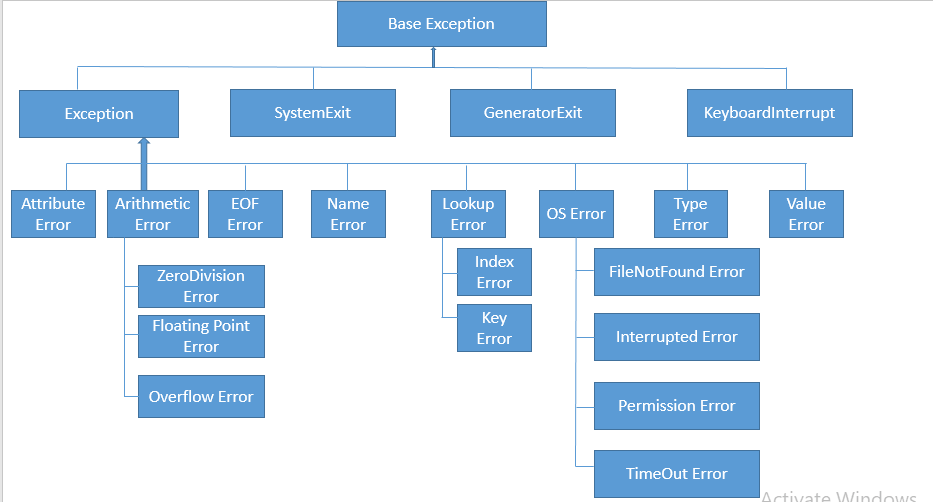

Исключения можно обрабатывать при помощи блока `try-except-else`, а также вызывать самостоятельно при помощи инструкции `raise`.

In [ ]:
# пример обработки исключения
print(1)
print(2)
try:
    print(3)
    print(1/0)
    print(4)
except ZeroDivisionError:
    print('Ошибка деления на ноль!')
print(5)

# 1
# 2
# 3
# Ошибка деления на ноль!
# 5

In [ ]:
# пример вызова исключения
try:
    number = int(input())
except:
    raise ValueError('Неправильный тип данных') # вызовется при введении типа данных, отличного от int

# **Распространение исключений**

Если исключение вызывается из функции, которая вложена в другую функцию, то его можно отследить и перехватить в обеих (работает и с большим числом функций). Желательно обрабатывать исключения там, где они появляются, иначе блок кода может не отработать (см. примеры).

In [ ]:
# пример распространения исключения
def second_func():
    print('Начало работы функции second_func')
    1/0
    print('Конец работы функции second_func')


def first_func():
    print('Начало работы функции first_func')
    second_func()
    print('Конец работы функции first_func')


print(1)
print(2)
first_func()
print(3) # не отработает

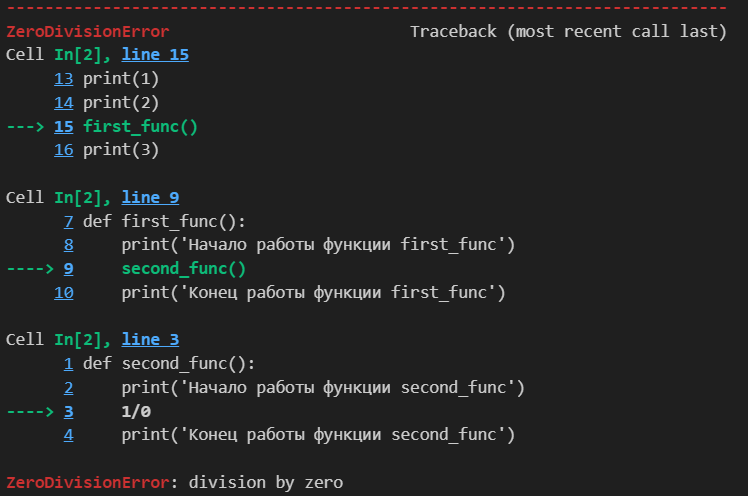

In [ ]:
# пример обработки исключения во вложенной функции
def first_func():
    print('Начало работы функции first_func')
    try:
        second_func()
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex}')
    print('Конец работы функции first_func')


def second_func():
    print('Начало работы функции second_func')
    third_func()
    print('Конец работы функции second_func')


def third_func():
    print('Начало работы функции third_func')
    1 / 0
    print('Конец работы функции third_func')


print(1)
print(2)
first_func()
print(3)

# 1
# 2
# Начало работы функции first_func
# Начало работы функции second_func
# Начало работы функции third_func
# Внимание! Обработано исключение: division by zero
# Конец работы функции first_func
# 3

# программа не отработала до конца

In [ ]:
def first_func():
    print('Начало работы функции first_func')
    try:
        second_func()
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex} на уровне first_func')
    print('Конец работы функции first_func')


def second_func():
    print('Начало работы функции second_func')
    try:
        third_func()
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex} на уровне second_func')
    print('Конец работы функции second_func')


def third_func():
    print('Начало работы функции third_func')
    try:
        1 / 0
    except Exception as ex:
        print(f'Внимание! Обработано исключение: {ex} на уровне third_func')
    print('Конец работы функции third_func')


print(1)
print(2)
first_func()
print(3)

# 1
# 2
# Начало работы функции first_func
# Начало работы функции second_func
# Начало работы функции third_func
# Внимание! Обработано исключение: division by zero на уровне third_func
# Конец работы функции third_func
# Конец работы функции second_func
# Конец работы функции first_func
# 3

# если обрабатывать там, где надо, всё отработает до конца